In [1]:
# show version numbers of libraries

# Python -> use platform and sys modules
import platform, sys
print(f"Python: {platform.platform()}, version: {sys.version[0:6]}")

# data science libraries
import numpy as np
import pandas as pd
import seaborn as sns
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
print(f"seaborn: {sns.__version__}")

# plotting library
import matplotlib as mp
print(f"matplotlib: {mp.__version__}")

# ML-models library
import sklearn as sk
print(f"scikit-learn: {sk.__version__}")

# statistics library
import statsmodels
print(f"statsmodels: {statsmodels.__version__}")

Python: Windows-10-10.0.26100-SP0, version: 3.11.9
numpy: 2.3.4
pandas: 2.3.3
seaborn: 0.13.2
matplotlib: 3.10.7
scikit-learn: 1.7.2
statsmodels: 0.14.5


---
## Linear regression en correlatieanalyse

In voorafgegane voorbeelden is telkens de gehele dataset meegenomen in de training van het ML-model. Dat leidt snel tot overfitting, hetgeen betekent dat het ML-model **niet** correcte resultaten laat zien voor onbekende data; het heeft zich **teveel** aangepast aan de trianingsdata.

De gebruikelijke manier in data science is de dataset te splitsen in trainingsdata en  testdata. Het ML-model train je met de trainingsdata en valideer je met de testdata.

NB. Duidelijk moet zijn dat de testdata nooit meegenomen mogen worden in de trainingsfase! Beredeneer voor jezelf waarom niet.

In het volgende zie je een voorbeeld van splitsen met gebruik maken van de scikit-learn library. Vervolgens komt een validatietechniek aan bod, in dit geval een correlatieanalyse.

In [2]:
%matplotlib inline

# libraries
import pandas as pd
import os 
import numpy as np
#from pylab import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# helper function: sometimes it is helpfull
# to have a function, especially when OS-platform
# issues are important.
#
# 2022-1023 PP: It is possible to get the ImportError:
#,              Missing optional dependency 'xlrd'. 
#     Solution: Install xlrd >= 1.0.0 for Excel support
#               Use pip or conda to install xlrd.
#
# LET OP: als je XLRD nog niet hebt geïmporteerd doe dat dan via je terminal "pip install xlrd"
import os
def load_xls_pd_data(path, filename):
    '''
    load_xls_pd_data() - construct a pandas DataFrame object 
           from data in a Excel xls-file `filename`,
           stored in a folder `path`.
    @returns: a pandas DataFrame
    '''
    xls_path = os.path.join(path, filename)
    # DEBUG: print(xls_path)
    return pd.read_excel(xls_path)


In [5]:
# load the dataset cars using a helper function 
cars_df = load_xls_pd_data("./data", "cars.xls")
cars_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,US
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,US
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,US
4,ford torino,17.0,8,302.0,140,3449,10.5,70,US


In eerste instantie bekijken we of er een relatie is tussen twee variabelen, namelijk `MPG` en `Horsepower`. Deze linear regression wordt genoemd  **simple linear regression**.

NB. `MPG` staat voor Miles Per Gallon en wordt gebruikt om aan te geven hoe ver de auto kan rijden voor elke gallon (of 4,55 liter) brandstof die hij verbruikt.

In [6]:
y = cars_df.MPG  # dependend variable MPG
X = cars_df.Horsepower  # independend variable Horsepower

In [8]:
# splitsen data in een trainingsset en een testset
X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame(X), y,
    test_size=0.3, random_state=42
)

In [9]:
# fit the model on the training data using linear regression module
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# ML-model
print(f"Slope: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
print(f"ML-model: MPG = {regressor.coef_[0]:0.3f}*Horsepower + {regressor.intercept_:0.3f}")

Slope: [-0.16634926]
Intercept: 41.084835639762105
ML-model: MPG = -0.166*Horsepower + 41.085


Hoe goed het ML-model is, bereken we de RMSE waarde.
Kortweg gezegd, RMSE vertelt je hoe geconcentreerd de gegevens zijn rond de best passende lijn.

RMSE is 0, als alle punten op de regressielijn liggen (en er dus geen fouten zijn).

Details:
Root Mean Square Error (RMSE) is de standaarddeviatie van de residuen (voorspellingsfouten). Residuen zijn een maatstaf voor hoe ver de gegevenspunten van de regressielijn verwijderd zijn; RMSE is een maat voor hoe verspreid deze residuen zijn.  Bron: [statistics howto](https://www.statisticshowto.com/probability-and-statistics/regression-analysis/rmse-root-mean-square-error/)

In [11]:
# test the model on the test data
from math import sqrt

y_prediction = regressor.predict(X_test)
RMSE = sqrt(
    mean_squared_error(
        y_true = y_test,
        y_pred = y_prediction
    )
)
print(RMSE)

4.955413560049771


In [12]:
# some other metrics
from sklearn.metrics import r2_score

# variance score: 1 is perfect prediction
variance_score = r2_score(y_test, y_prediction)
print(f"Variance score:{variance_score:.2f}")

# accuracy: higher is better
accuracy = regressor.score(X_test, y_test)
print("Prediction Accuracy: {:.2f}%".format(accuracy * 100))

Variance score:0.54
Prediction Accuracy: 53.58%


In [13]:
from pathlib import Path
# Create the `images/training_linear_models` folder
IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


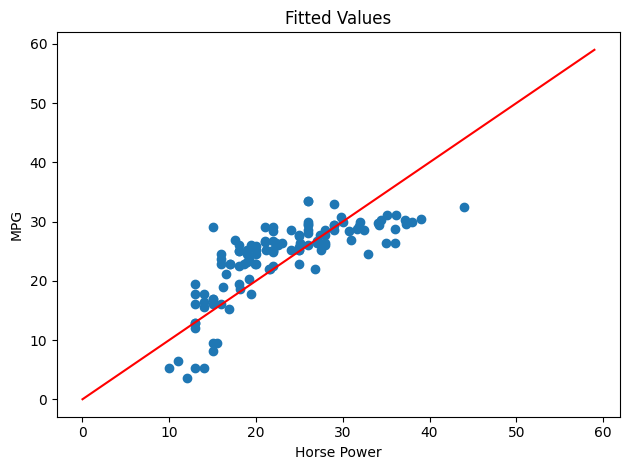

In [14]:
# plot the fitted slope...

# add your actual vs. predicted points 
# keep in mind: test data!

plt.scatter(y_test, regressor.predict(X_test)) 

# add the line of perfect fit 
straight_line = np.arange(0, 60) 
plt.plot(straight_line, straight_line, "-r") 

# add title and labels
plt.title("Fitted Values") 
plt.xlabel("Horse Power")
plt.ylabel("MPG")

save_fig("cars_single_variant")
plt.show()


Om te bekijken hoe sterk de relatie is tussen MPG and Horsepower, doen we een correlatieanalyse.

**Correlatieanalyse** is een statistische methode om de sterkte van een relatie tussen twee variabelen te evalueren, die numeriek en continu moeten zijn. 

Opgemerkt moet worden dat **correlatie geen causaliteit impliceert**. Dit betekent dat zelfs als we een positieve of negatieve correlatie tussen twee variabelen vinden, dit ons niets zegt over of een van hen de oorzaak is van de andere of niet. Het betekent duidelijk dat er een verband is tussen deze twee variabelen, en dat is het dan.

In [15]:
import statsmodels.api as sm
from scipy.stats import t
import random

In [16]:
# add a constant column so we have
# the same equation of the linear regression
X_multi=sm.tools.tools.add_constant(
    X_train, prepend=True, has_constant='skip'
)
# X_multi

In [17]:
# perform the Ordinary Least Square regression (OLS)
mod = sm.OLS(y_train, X_multi)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     455.7
Date:                Fri, 07 Nov 2025   Prob (F-statistic):           4.55e-60
Time:                        13:29:05   Log-Likelihood:                -823.78
No. Observations:                 274   AIC:                             1652.
Df Residuals:                     272   BIC:                             1659.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.0848      0.869     47.255      0.0

De belangrijkste dingen om naar te kijken uit deze tabel is de R<sup>2</sup>  waarde.

Als R<sup>2</sup> = 0, dan is ons model nutteloos en vermindert het de fout niet. Aan de andere kant, als R<sup>2</sup> = 1, dan is dat het ultieme doel.

Zoals we zien, is R<sup>2</sup> laag, wat aangeeft dat de variabele `Horsepower` niet alleen kan worden gebruikt om de `MPG` correct te voorspellen. Er zulen dus meerdere features/attributen meegenomen moeten worden om de uitvoer te voorspellen -> Opdracht multiple linear regression.

### Model bewaren

Een getraind model kan worden geëxporteerd en opgeslagen, zodat het later kan worden geïmporteerd en gebruikt. Een manier om een model op te slaan is door de `pickle` module van Python te gebruiken.

Slope: [-0.16634926]
Intercept: 41.084835639762105
ML-model: MPG = -0.166*Horsepower + 41.085
RMSE: 4.955413560049771


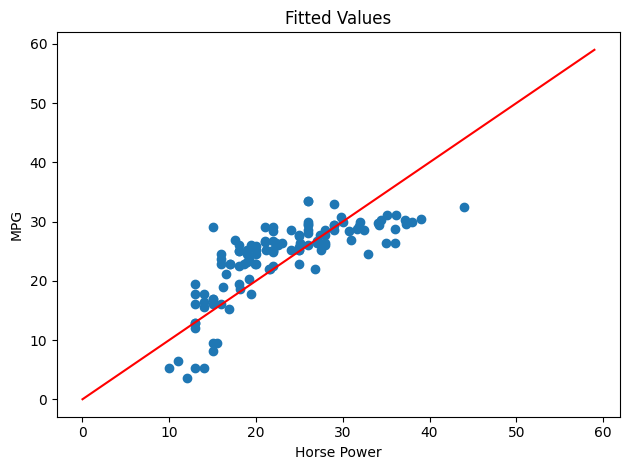

In [18]:
import pickle

# Save trained model to file
pickle.dump(regressor, open("linear_regresson_cars.pkl", "wb"))

# TEST: Load a saved model and make a prediction on a single example
loaded_model = pickle.load(open("linear_regresson_cars.pkl", "rb"))
y_prediction_loaded_model = loaded_model.predict(X_test)

# =================
# print parameters and metrics from loaded_model
# compare it with the trained model
# =================

# ML-model: slope and intercept
print(f"Slope: {loaded_model.coef_}")
print(f"Intercept: {loaded_model.intercept_}")
print(f"ML-model: MPG = {loaded_model.coef_[0]:0.3f}*Horsepower + {loaded_model.intercept_:0.3f}")

# ML-model: RMSE
RMSE = sqrt(
    mean_squared_error(
        y_true = y_test,
        y_pred = y_prediction_loaded_model
    )
)
print(f"RMSE: {RMSE}")

# plot data with fitted line from the loaded model
plt.scatter(y_test, y_prediction_loaded_model)
straight_line = np.arange(0, 60) 
plt.plot(straight_line, straight_line, "-r") 
plt.title("Fitted Values") 
plt.xlabel("Horse Power")
plt.ylabel("MPG")

save_fig("cars_single_variant_saved_model")
plt.show()

## Opdracht multiple linear regression

In deze opdracht gaan jullie met behulp van `Statsmodels` een meervoudige linear regression (*multiple linear regression*) uitvoeren op de dataset `cars.xls`..

Instructies:
1. importeer de libraries `pandas`, `numpy`, `statsmodels.api` en `matplotlib.pyplot`.
2. import de dataset `cars.xls` in een pandas DataFrame `cars_df`.
3. kies wederom `MPG` als dependend variabele.
4. kies alle attributen, behalve `Model` als de independend variabelen.
5. Maak gebruik van `DataFrame.get_dummies()` om categorie data om te zetten in dummy variablen (*one-hot-encoding*). Hint: kijk welke feature/attribute categorie data is.
6. splits data in twee datasets, met 30% testdata.
7. voer een regressie analyse uit met Statsmodels, zoals in voorbeeld is gedaan (correlatieanalyse).
8. print de *OLS Regression Result* tabel en check dat R<sup>2</sup> ±82,6 procent is voor de meervoudige lineaire regressie, wat veel beter is dan eenvoudige lineaire regressie, waar we slechts 62,5 procent kregen.
9. optioneel: zoek op wat **p-value** betekent in de statistiek en kijk of je een interpretatie uit de OLS Regression Result tabel kan halen.

In [19]:
# hier komt jouw code...
